EDA for project LENTA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pr_df = pd.read_csv("C:\\Users\\Den\\Downloads\\sp_sales_task\\pr_df.csv")

pr_df.csv – данные по товарной иерархии. 

От большего к меньшему pr_group_id - pr_cat_id - pr_subcat_id - pr_sku_id.

Столбцы: 
    
pr_group_id – захэшированная группа товара; 

pr_cat_id – захэшированная категория товара; 

pr_subcat_id – захэшированная подкатегория товара;

pr_sku_id – захэшированное id товара;

pr_uom_id (маркер, обозначающий продаётся товар на вес или в ШТ).



In [3]:
sales_df_train = pd.read_csv('C:\\Users\\Den\\Downloads\\sp_sales_task\\sales_df_train.csv')

sales_df_train.csv –данные по продажам за скользящий год для обучения. 

Столбцы: 
    
st_id – захэшированное id магазина;

pr_sku_id – захэшированное id товара;

date – дата;

pr_sales_type_id – флаг наличия промо;

pr_sales_in_units – число проданных товаров без признака промо;

pr_promo_sales_in_units – число проданных товаров с признаком промо;

pr_sales_in_rub – продажи без признака промо в РУБ;

pr_promo_sales_in_rub – продажи с признаком промо в РУБ;


In [4]:
sales_submission = pd.read_csv('C:\\Users\\Den\\Downloads\\sp_sales_task\\sales_submission.csv')

sales_submission.csv – пример файла с результатом работы модели прогноза спроса. 

Необходимо подготовить файл в таком же формате, заполнив колонку target предсказаниями (по умолчанию колонка заполнена нулями). 

Столбцы:
    
st_id – захэшированное id магазина; 

pr_sku_id – захэшированное id товара;

date – дата (день);

target – спрос в ШТ

In [5]:
st_df = pd.read_csv('C:\\Users\\Den\\Downloads\\sp_sales_task\\st_df.csv')

st_df.csv – данные по магазинам. 

Столбцы: 
    
st_id – захэшированное id магазина;

st_city_id – захэшированное id города;

st_division_code id – захэшированное id дивизиона;

st_type_format_id – id формата магазина; 

st_type_loc_id – id тип локации/окружения магазина;

st_type_size_id – id типа размера магазина;

st_is_active – флаг активного магазина на данный момент.


In [6]:
def def_about(data):
    
    print('Tип данных, диапазон, столбцы, количество записей в каждом столбце, если столбцы не равны нулю')
    print('                                  ')
    data.info()
    print('                                  ')      
    print('Пример случайных строк из датасета')
    print('                                  ')     
    display(data.sample(n=10, random_state=12345))
    print('                                  ')     
    print('Разброс значений, среднее и медиана')
    print('                                  ')    
    print(data.describe().T)
    print('                                  ') 
    len_data = len(data)
    print('Количество записей: \t {0}'.format(len_data))
    print('                                  ') 
    print('Количество столбцов: \t {0}'.format(len(data.columns)))
    print('                                  ') 
    count = 0
    for col in data.columns:
        notnull = data[col].notna().sum()
        if notnull < len_data:
            count+=1
    print('Пропуски присутствуют в {} столбцах из {}'.format(count,len(data.columns)))
    print('                                  ') 
    print('Количество явных дубликатов данных: {}'.format(data.duplicated().sum()))
    print('                                  ') 
    

In [7]:
def_about(pr_df)

Tип данных, диапазон, столбцы, количество записей в каждом столбце, если столбцы не равны нулю
                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pr_sku_id     2050 non-null   object
 1   pr_group_id   2050 non-null   object
 2   pr_cat_id     2050 non-null   object
 3   pr_subcat_id  2050 non-null   object
 4   pr_uom_id     2050 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.2+ KB
                                  
Пример случайных строк из датасета
                                  


,pr_sku_id,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
1713,4792d399b0cc6e8223fdb5b130e9387f,c74d97b01eae257e44aa9d5bade97baf,a368b0de8b91cfb3f91892fbf1ebd4b2,8feef08314d477a5b68ba18a6d35819d,17
467,6dc2d6abe22eaa15ea066134c983f2ac,c20ad4d76fe97759aa27a0c99bff6710,fb2fcd534b0ff3bbed73cc51df620323,f222c0d412b9a812f556597c95540276,1
1380,e8d0f573ac95947eeb28ff622fade5c6,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,41b1d51c9e3ba9a263361f9cfa0eb434,17
763,5839d00df7c33f98615fd2aaf9c87389,6512bd43d9caa6e02c990b0a82652dca,e58cc5ca94270acaceed13bc82dfedf7,c93c26cd49ea08e6b8984351d4164575,1
989,426157fed5629835a7d6217bbefccac9,aab3238922bcc25a6f606eb525ffdc56,28fc2782ea7ef51c1104ccf7b9bea13d,6bae9a61fa499b24f28c3ddcef6ccb1b,1
666,ef483b1a0ab164698fe9b232706f66ab,aab3238922bcc25a6f606eb525ffdc56,3de2334a314a7a72721f1f74a6cb4cee,cdfcda17c8ab17c2b917505c0264e471,17
1321,1142167b4bf803ff64a3ddc2e2211a2d,aab3238922bcc25a6f606eb525ffdc56,28fc2782ea7ef51c1104ccf7b9bea13d,485095ca4d0494dc265ad8de07ec107b,1
686,05a0b334e897df620ab915d173636099,c74d97b01eae257e44aa9d5bade97baf,f3173935ed8ac4bf073c1bcd63171f8a,cf6faa5b09823f159e09a786cba0dd88,1
462,be2eb3bcc9ebeba04e0441004e9a674b,c51ce410c124a10e0db5e4b97fc2af39,fd5c905bcd8c3348ad1b35d7231ee2b1,3dde95bfddfc5c387eb9e7b7a77dfa63,1
331,1315c014e0e20f2ffbe8c0bc455bce9c,aab3238922bcc25a6f606eb525ffdc56,28fc2782ea7ef51c1104ccf7b9bea13d,7a8aebb07d6e8ba9da453ec0f3f359a4,1


                                  
Разброс значений, среднее и медиана
                                  
            count      mean       std  min  25%  50%   75%   max
pr_uom_id  2050.0  7.017561  7.752371  1.0  1.0  1.0  17.0  17.0
                                  
Количество записей: 	 2050
                                  
Количество столбцов: 	 5
                                  
Пропуски присутствуют в 0 столбцах из 5
                                  
Количество явных дубликатов данных: 0
                                  


In [8]:
def_about(sales_df_train)

Tип данных, диапазон, столбцы, количество записей в каждом столбце, если столбцы не равны нулю
                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   st_id                    883015 non-null  object 
 1   pr_sku_id                883015 non-null  object 
 2   date                     883015 non-null  object 
 3   pr_sales_type_id         883015 non-null  int64  
 4   pr_sales_in_units        883015 non-null  float64
 5   pr_promo_sales_in_units  883015 non-null  float64
 6   pr_sales_in_rub          883015 non-null  float64
 7   pr_promo_sales_in_rub    883015 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 53.9+ MB
                                  
Пример случайных строк из датасета
                                  


,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
55032,fa7cdfad1a5aaf8370ebeda47a1ff1c3,b610088ddf586449793d3c6da70d4c56,2022-10-25,1,6.0,6.0,1293.0,1293.0
644590,f7e6c85504ce6e82442c770f7c8606f0,f25745018bf22f005d1f198e2552191f,2022-09-27,0,3.0,0.0,262.0,0.0
517895,42a0e188f5033bc65bf8d78622277c4e,e4522fed8db6c62127eedea2fe1634bd,2022-12-11,0,4.0,0.0,147.0,0.0
845470,1ecfb463472ec9115b10c292ef8bc986,62d4af457ba2540ce0898a211c0cd17a,2022-09-08,1,2.0,2.0,25.0,25.0
554615,6364d3f0f495b6ab9dcf8d3b5c6e0b01,bf5f373eede102c71bf77874c78bdc59,2023-02-02,1,1.0,1.0,151.0,151.0
660557,c81e728d9d4c2f636f067f89cc14862c,a4680e47cdf0ef37aeb19717a9d1968c,2023-02-03,0,3.0,0.0,599.0,0.0
616800,1ecfb463472ec9115b10c292ef8bc986,5f86639bbaacbed711e89635b602cc75,2023-03-13,1,2.0,2.0,105.0,105.0
643741,f7e6c85504ce6e82442c770f7c8606f0,f8e67df2dd557f44074271107ab9781a,2022-09-09,0,3.0,0.0,313.0,0.0
256837,f7e6c85504ce6e82442c770f7c8606f0,364196813f3b746270a9b27bd76149c9,2022-09-24,0,11.0,0.0,2945.0,0.0
437173,16a5cdae362b8d27a1d8f8c7b78b4330,8cc3c766285e320aef48183a4bbe22d1,2022-11-20,0,7.0,0.0,332.0,0.0


                                  
Разброс значений, среднее и медиана
                                  
                            count        mean          std     min   25%  \
pr_sales_type_id         883015.0    0.406486     0.491178     0.0   0.0   
pr_sales_in_units        883015.0    5.037956    13.402984   -39.0   1.0   
pr_promo_sales_in_units  883015.0    2.230010    11.063288   -39.0   0.0   
pr_sales_in_rub          883015.0  596.705181  1577.366179 -3373.0  98.0   
pr_promo_sales_in_rub    883015.0  294.766561  1402.764168 -3373.0   0.0   

                           50%    75%       max  
pr_sales_type_id           0.0    1.0       1.0  
pr_sales_in_units          2.0    4.0    2348.0  
pr_promo_sales_in_units    0.0    1.0    2348.0  
pr_sales_in_rub          224.0  540.0  183265.0  
pr_promo_sales_in_rub      0.0  127.0  183265.0  
                                  
Количество записей: 	 883015
                                  
Количество столбцов: 	 8
             

In [9]:
def_about(sales_submission)

Tип данных, диапазон, столбцы, количество записей в каждом столбце, если столбцы не равны нулю
                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43694 entries, 0 to 43693
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   st_id      43694 non-null  object
 1   pr_sku_id  43694 non-null  object
 2   date       43694 non-null  object
 3   target     43694 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.3+ MB
                                  
Пример случайных строк из датасета
                                  


,st_id,pr_sku_id,date,target
41016,16a5cdae362b8d27a1d8f8c7b78b4330,cfa2eba0e5c031e0d78a6b4529882e80,2023-08-01,0
40372,fa7cdfad1a5aaf8370ebeda47a1ff1c3,880eacb0f685ac0b2a134d819a077d64,2023-07-31,0
16125,16a5cdae362b8d27a1d8f8c7b78b4330,f07e911d46314ccb8f06a7ac863159df,2023-07-26,0
6589,16a5cdae362b8d27a1d8f8c7b78b4330,a3efb98822777de56766f50b73f62682,2023-07-22,0
16412,42a0e188f5033bc65bf8d78622277c4e,3c6d5538de13300a189c89d4f1e18624,2023-07-26,0
11785,f7e6c85504ce6e82442c770f7c8606f0,62d4af457ba2540ce0898a211c0cd17a,2023-07-24,0
36213,c81e728d9d4c2f636f067f89cc14862c,525054066e1d6e94a6ad56078f4b212d,2023-07-30,0
43326,fa7cdfad1a5aaf8370ebeda47a1ff1c3,2df818c9b00c8a0b0beb4b47aa78d6d4,2023-08-01,0
32727,6364d3f0f495b6ab9dcf8d3b5c6e0b01,996200890299d6633aefad9073dba4e2,2023-07-29,0
18433,fa7cdfad1a5aaf8370ebeda47a1ff1c3,5963deb0a145213e5b69c75e3953602b,2023-07-26,0


                                  
Разброс значений, среднее и медиана
                                  
          count  mean  std  min  25%  50%  75%  max
target  43694.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
                                  
Количество записей: 	 43694
                                  
Количество столбцов: 	 4
                                  
Пропуски присутствуют в 0 столбцах из 4
                                  
Количество явных дубликатов данных: 0
                                  


In [10]:
def_about(st_df)

Tип данных, диапазон, столбцы, количество записей в каждом столбце, если столбцы не равны нулю
                                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   st_id              12 non-null     object
 1   st_city_id         12 non-null     object
 2   st_division_code   12 non-null     object
 3   st_type_format_id  12 non-null     int64 
 4   st_type_loc_id     12 non-null     int64 
 5   st_type_size_id    12 non-null     int64 
 6   st_is_active       12 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 804.0+ bytes
                                  
Пример случайных строк из датасета
                                  


,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
8,fa7cdfad1a5aaf8370ebeda47a1ff1c3,885fe656777008c335ac96072a45be15,296bd0cc6e735f9d7488ebc8fbc19130,1,1,12,1
0,1aa057313c28fa4a40c5bc084b11d276,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,19,0
3,1ecfb463472ec9115b10c292ef8bc986,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,2,1,28,1
7,c81e728d9d4c2f636f067f89cc14862c,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1
11,084a8a9aa8cced9175bd07bc44998e75,3202111cf90e7c816a472aaceb72b0df,32586311f16876abf92901085bd87b99,4,3,19,1
10,62f91ce9b820a491ee78c108636db089,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,32,0
6,42a0e188f5033bc65bf8d78622277c4e,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
9,f7e6c85504ce6e82442c770f7c8606f0,3202111cf90e7c816a472aaceb72b0df,32586311f16876abf92901085bd87b99,1,1,12,1
4,16a5cdae362b8d27a1d8f8c7b78b4330,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1,2,8,1
1,bd470ca955d9497bbcb808e59952fffc,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,19,1


                                  
Разброс значений, среднее и медиана
                                  
                   count       mean       std  min   25%   50%    75%   max
st_type_format_id   12.0   2.333333  1.497473  1.0   1.0   1.5   4.00   4.0
st_type_loc_id      12.0   1.916667  0.996205  1.0   1.0   1.5   3.00   3.0
st_type_size_id     12.0  16.750000  7.557356  8.0  12.0  15.5  19.25  32.0
st_is_active        12.0   0.833333  0.389249  0.0   1.0   1.0   1.00   1.0
                                  
Количество записей: 	 12
                                  
Количество столбцов: 	 7
                                  
Пропуски присутствуют в 0 столбцах из 7
                                  
Количество явных дубликатов данных: 0
                                  


In [11]:
sales_df_train['pr_sales_in_units'].value_counts()

1.0      267524
2.0      158038
3.0       92918
4.0       83154
0.0       66543
          ...  
679.0         1
553.0         1
291.0         1
898.0         1
850.0         1
Name: pr_sales_in_units, Length: 392, dtype: int64

(-50.0, 1.0)

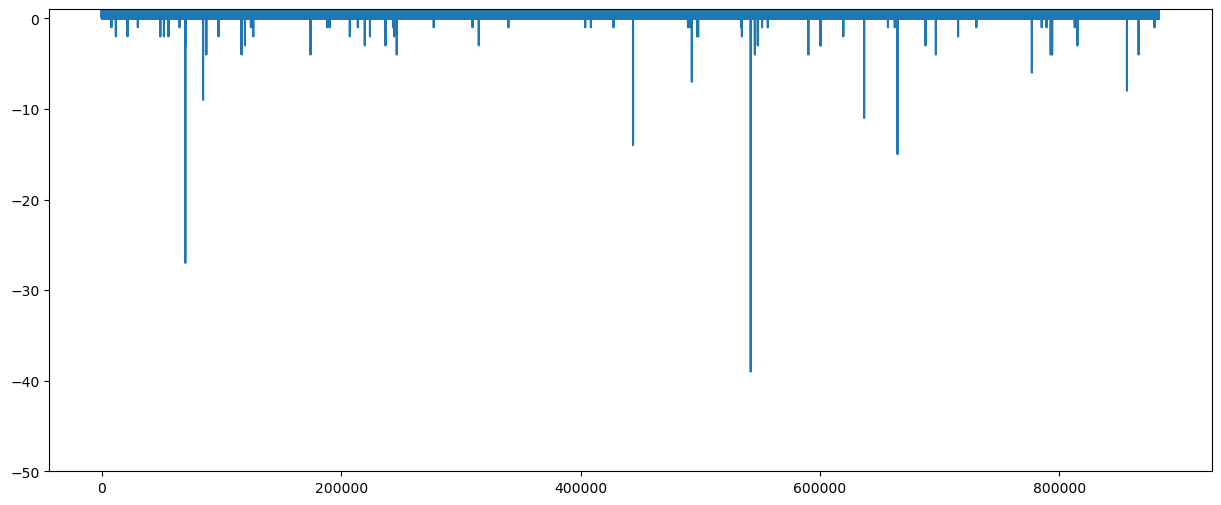

In [12]:
sales_df_train['pr_sales_in_units'].plot(figsize=(15, 6))
plt.ylim((-50,1))

In [13]:
test_1 = sales_df_train.loc[sales_df_train['pr_sales_in_rub'] < 0]
test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 7919 to 879432
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   st_id                    78 non-null     object 
 1   pr_sku_id                78 non-null     object 
 2   date                     78 non-null     object 
 3   pr_sales_type_id         78 non-null     int64  
 4   pr_sales_in_units        78 non-null     float64
 5   pr_promo_sales_in_units  78 non-null     float64
 6   pr_sales_in_rub          78 non-null     float64
 7   pr_promo_sales_in_rub    78 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 5.5+ KB


In [14]:
test_1

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
7919,6364d3f0f495b6ab9dcf8d3b5c6e0b01,13928e132e7e0e55a0a8a6f0fd539758,2022-09-29,0,-1.0,0.0,-763.0,0.0
11635,fa7cdfad1a5aaf8370ebeda47a1ff1c3,b66f2459d3013603d5c924ee370093c8,2023-06-12,1,-2.0,-2.0,-344.0,-344.0
21385,fa7cdfad1a5aaf8370ebeda47a1ff1c3,9aa7008fa27151bf77be5f4c9d023d5f,2023-04-06,0,-2.0,0.0,-48.0,0.0
30000,6364d3f0f495b6ab9dcf8d3b5c6e0b01,364196813f3b746270a9b27bd76149c9,2023-04-21,0,-1.0,0.0,-182.0,0.0
43146,f7e6c85504ce6e82442c770f7c8606f0,699dc7822b719137e8124b728ab45fa3,2022-11-10,1,-0.0,-0.0,-32.0,-32.0
...,...,...,...,...,...,...,...,...
815057,1ecfb463472ec9115b10c292ef8bc986,c82dccf4ccf7017ba622a86f5dcbc736,2022-12-19,1,-3.0,-3.0,-454.0,-454.0
849426,c81e728d9d4c2f636f067f89cc14862c,4ce0eb956648ab3ff6bb0afa3158cc42,2023-01-31,0,-0.0,0.0,-51.0,0.0
856454,42a0e188f5033bc65bf8d78622277c4e,5ca106c323e777ec8b42dbbab099932c,2022-10-21,0,-8.0,0.0,-409.0,0.0
866176,16a5cdae362b8d27a1d8f8c7b78b4330,b067862254b74824193087f2a16c0c79,2023-05-26,1,-4.0,-4.0,-2430.0,-2430.0


(-4000.0, 1.0)

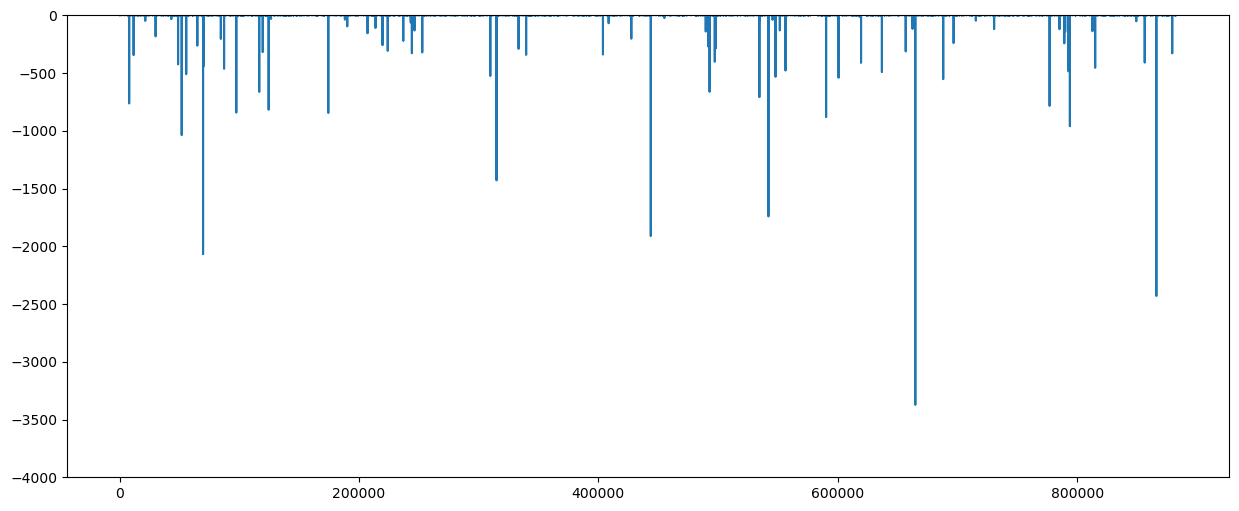

In [15]:
sales_df_train['pr_sales_in_rub'].plot(figsize=(15, 6))
plt.ylim((-4000,1))

In [16]:
pr_df['pr_sku_id'].value_counts()

fd064933250b0bfe4f926b867b0a5ec8    1
da74b0abdd41cdf458afd0dfebf8c251    1
b57b9a839378f969db586df10679d53b    1
b1cef50685daf98378285905bf554e8c    1
be271ebec86ed632d4d59ca0b7a5c072    1
                                   ..
e644b4306f7ecd4d5158ac0179db76a5    1
8146f98d564daf7f6cc87d9edcb92705    1
b77bf3cb7967619f5b3d226d63dae631    1
2d5d5ab212f4c4e7498f31ca7d77edbd    1
dbfce512dcdabc6b6e2724b6ec44efda    1
Name: pr_sku_id, Length: 2050, dtype: int64

In [17]:
pr_df['pr_uom_id'].value_counts()

1     1279
17     771
Name: pr_uom_id, dtype: int64

In [18]:
pr_df['pr_group_id'].value_counts()

c74d97b01eae257e44aa9d5bade97baf    806
aab3238922bcc25a6f606eb525ffdc56    717
6512bd43d9caa6e02c990b0a82652dca    203
c51ce410c124a10e0db5e4b97fc2af39    182
c20ad4d76fe97759aa27a0c99bff6710     73
1ff1de774005f8da13f42943881c655f     37
32bb90e8976aab5298d5da10fe66f21d     27
98f13708210194c475687be6106a3b84      4
3c59dc048e8850243be8079a5c74d079      1
Name: pr_group_id, dtype: int64

In [19]:
pr_df['pr_cat_id'].value_counts()

c559da2ba967eb820766939a658022c8    265
9701a1c165dd9420816bfec5edd6c2b1    222
1bc0249a6412ef49b07fe6f62e6dc8de    211
28fc2782ea7ef51c1104ccf7b9bea13d    167
46771d1f432b42343f56f791422a4991    112
f3173935ed8ac4bf073c1bcd63171f8a    111
e58cc5ca94270acaceed13bc82dfedf7     99
a368b0de8b91cfb3f91892fbf1ebd4b2     88
3de2334a314a7a72721f1f74a6cb4cee     79
fb2fcd534b0ff3bbed73cc51df620323     72
535ab76633d94208236a2e829ea6d888     61
b7087c1f4f89e63af8d46f3b20271153     43
7a6a74cbe87bc60030a4bd041dd47b78     42
b59c67bf196a4758191e42f76670ceba     39
a6ea8471c120fe8cc35a2954c9b9c595     37
faafda66202d234463057972460c04f5     33
c9f95a0a5af052bffce5c89917335f67     33
fd5c905bcd8c3348ad1b35d7231ee2b1     31
4edaa105d5f53590338791951e38c3ad     31
5caf41d62364d5b41a893adc1a9dd5d4     30
6d9c547cf146054a5a720606a7694467     25
186a157b2992e7daed3677ce8e9fe40f     25
a14ac55a4f27472c5d894ec1c3c743d2     21
f18a6d1cde4b205199de8729a6637b42     20
f9ab16852d455ce9203da64f4fc7f92d     20


In [20]:
sales_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   st_id                    883015 non-null  object 
 1   pr_sku_id                883015 non-null  object 
 2   date                     883015 non-null  object 
 3   pr_sales_type_id         883015 non-null  int64  
 4   pr_sales_in_units        883015 non-null  float64
 5   pr_promo_sales_in_units  883015 non-null  float64
 6   pr_sales_in_rub          883015 non-null  float64
 7   pr_promo_sales_in_rub    883015 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 53.9+ MB


In [21]:
sales_df_train['date'].value_counts()

2022-12-30    3396
2022-12-29    3322
2022-12-24    3233
2022-12-28    3126
2023-06-23    3033
              ... 
2023-01-03    2083
2023-04-17    2070
2023-01-09    2041
2023-01-02    1950
2023-01-01    1182
Name: date, Length: 352, dtype: int64

In [22]:
sales_df_train['st_id'].value_counts()

c81e728d9d4c2f636f067f89cc14862c    174687
16a5cdae362b8d27a1d8f8c7b78b4330    157542
42a0e188f5033bc65bf8d78622277c4e    140286
f7e6c85504ce6e82442c770f7c8606f0    124145
6364d3f0f495b6ab9dcf8d3b5c6e0b01    115830
fa7cdfad1a5aaf8370ebeda47a1ff1c3    110537
1ecfb463472ec9115b10c292ef8bc986     47404
53e19f3dbb211f20b20b45668303c1b6      9231
bd470ca955d9497bbcb808e59952fffc      2586
1aa057313c28fa4a40c5bc084b11d276       719
084a8a9aa8cced9175bd07bc44998e75        38
62f91ce9b820a491ee78c108636db089        10
Name: st_id, dtype: int64

In [23]:
sales_df_train.sort_index(inplace=True)
sales_df_train.index.is_monotonic

C:\Users\Den\AppData\Local\Temp\ipykernel_1220\2090133830.py:2: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  sales_df_train.index.is_monotonic


True

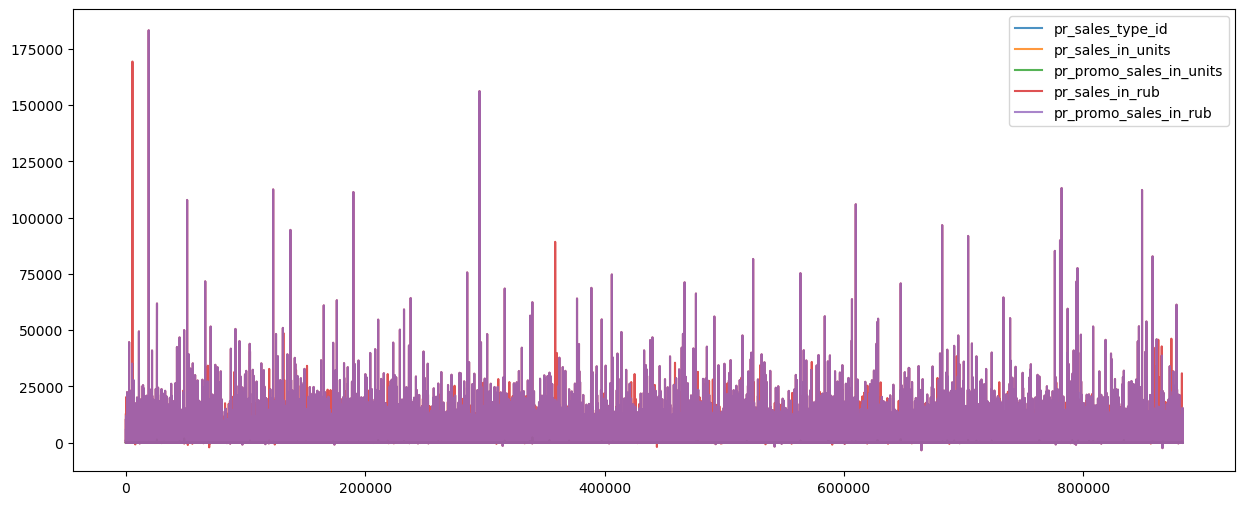

In [24]:
plt.figure(figsize=(15, 6))
sales_df_train.plot(ax=plt.gca(), alpha=0.8)
plt.show()

In [25]:
date_money = sales_df_train[['date','pr_sales_in_rub']]
date_money.head()

,date,pr_sales_in_rub
0,2022-10-20,825.0
1,2023-01-29,196.0
2,2023-03-02,78.0
3,2023-04-05,69.0
4,2023-02-17,161.0


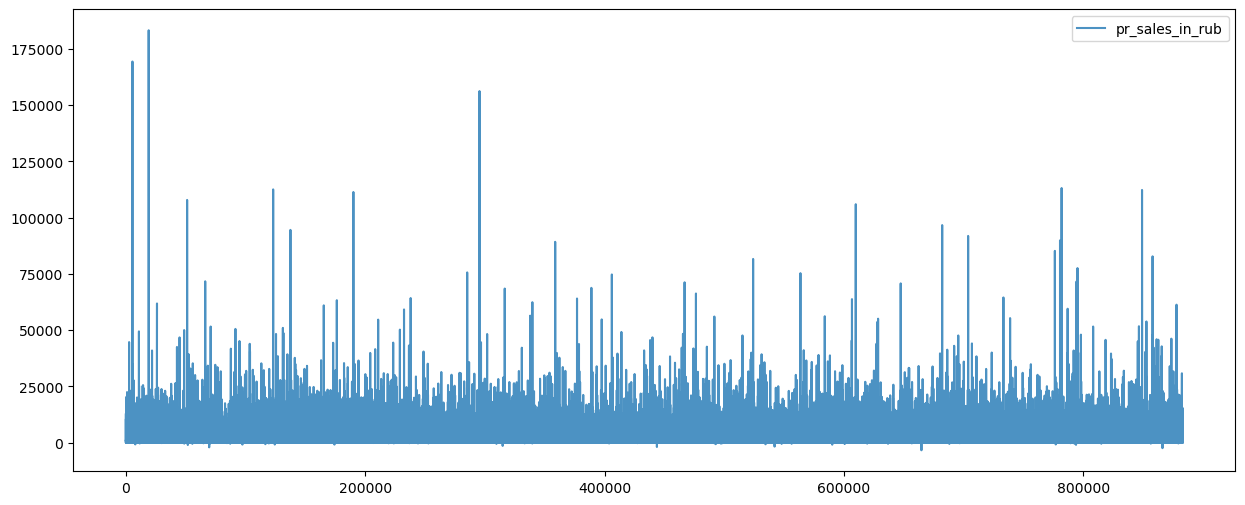

In [26]:
plt.figure(figsize=(15, 6))
date_money.plot(ax=plt.gca(), alpha=0.8)
plt.show()

<Axes: xlabel='date'>

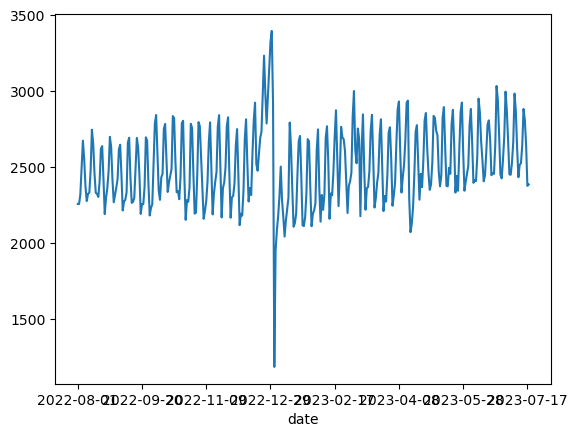

In [27]:
time_df = sales_df_train.groupby('date')['date'].count()
time_df.plot()

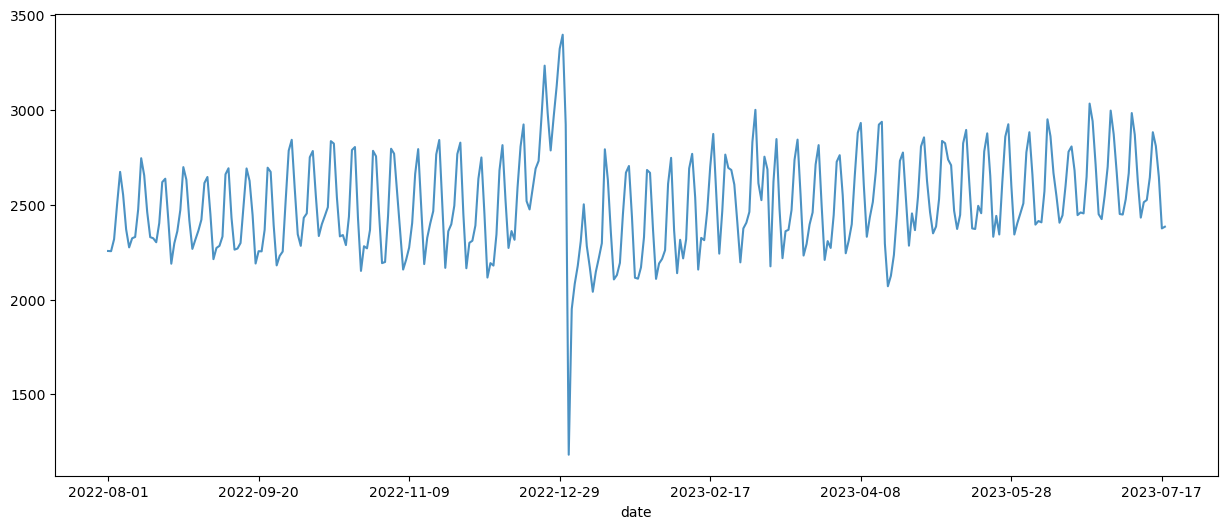

In [28]:
plt.figure(figsize=(15, 6))
time_df.plot(ax=plt.gca(), alpha=0.8)
plt.show()

<Axes: xlabel='date'>

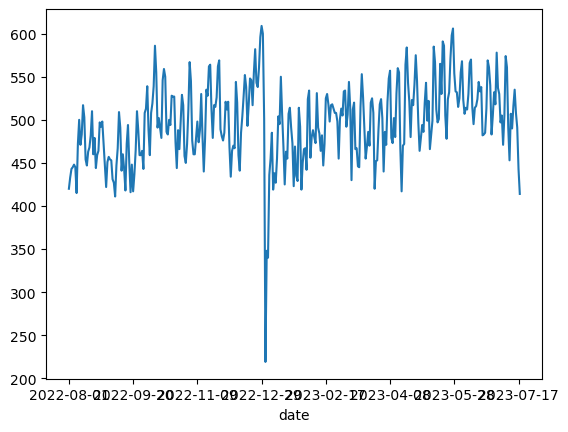

In [29]:
shop_1 = sales_df_train.loc[sales_df_train['st_id'] == 'c81e728d9d4c2f636f067f89cc14862c']
date_money = shop_1[['date','pr_sales_in_units']]
date_money.head()

time_df = date_money.groupby('date')['date'].count()
time_df.plot()

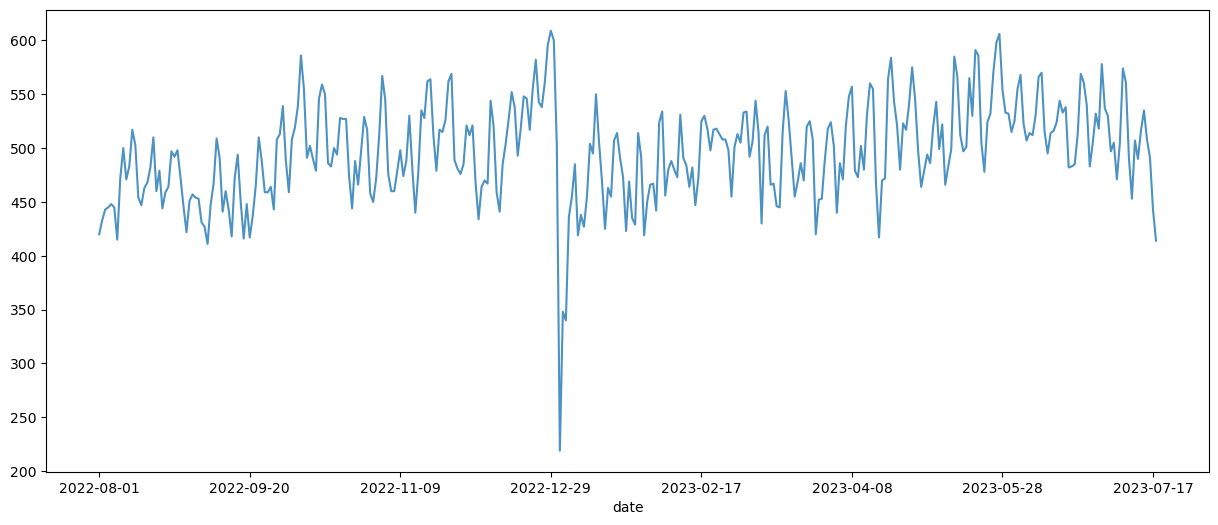

In [30]:
plt.figure(figsize=(15, 6))
time_df.plot(ax=plt.gca(), alpha=0.8)
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


In [32]:
! %pip install prophet

'%pip' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
train, test = date_money[:4000], date_money[4000:]

In [34]:
train

,date,pr_sales_in_units
0,2022-10-20,5.0
13,2023-06-19,1.0
15,2023-04-18,1.0
19,2022-09-13,5.0
21,2022-09-05,4.0
...,...,...
20008,2022-09-21,1.0
20013,2022-08-10,3.0
20025,2023-03-14,1.0
20029,2023-03-29,1.0


In [35]:
test = test.rename(columns={'date': 'ds', 'pr_sales_in_units': 'y'})
test

,ds,y
20035,2023-02-25,11.0
20037,2023-04-20,1.0
20038,2023-02-13,8.0
20042,2022-11-04,4.0
20059,2023-07-03,6.0
...,...,...
882984,2023-01-30,1.0
882992,2022-10-01,2.0
883002,2023-06-26,4.0
883003,2023-03-04,1.0


In [36]:
train = train.rename(columns={'date': 'ds', 'pr_sales_in_units': 'y'})
train

,ds,y
0,2022-10-20,5.0
13,2023-06-19,1.0
15,2023-04-18,1.0
19,2022-09-13,5.0
21,2022-09-05,4.0
...,...,...
20008,2022-09-21,1.0
20013,2022-08-10,3.0
20025,2023-03-14,1.0
20029,2023-03-29,1.0


In [37]:
model = Prophet()
model.fit(train)

19:35:59 - cmdstanpy - INFO - Chain [1] start processing
19:36:00 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
future = model.make_future_dataframe(periods=14, freq='D')

In [39]:
forecast = model.predict(future)

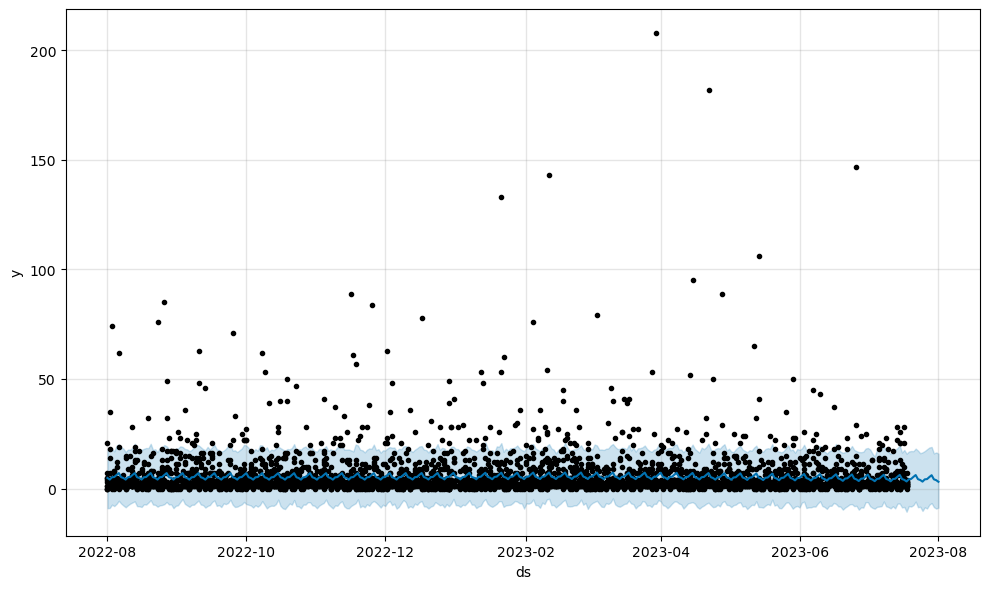

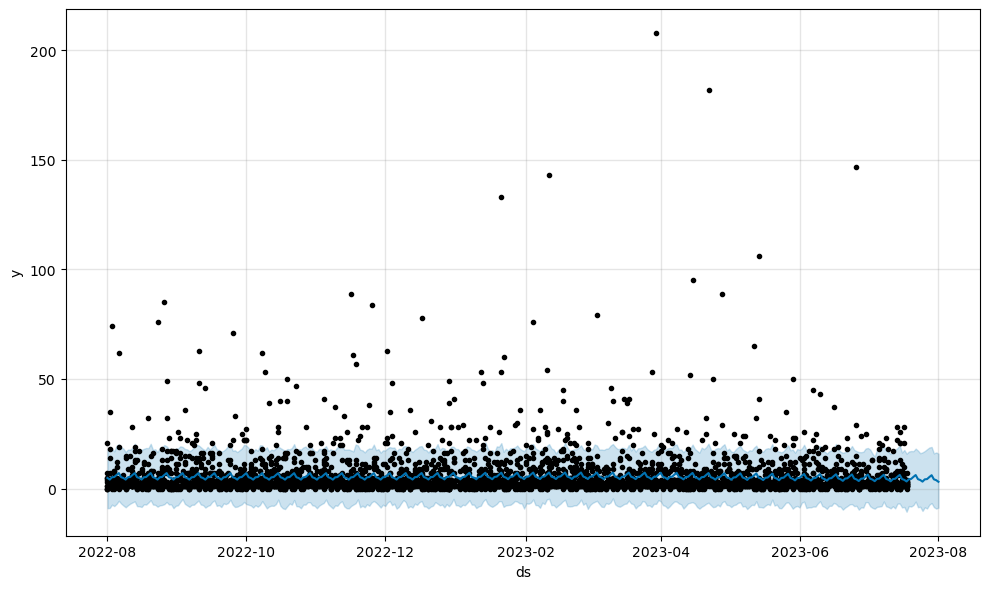

In [40]:
model.plot(forecast)

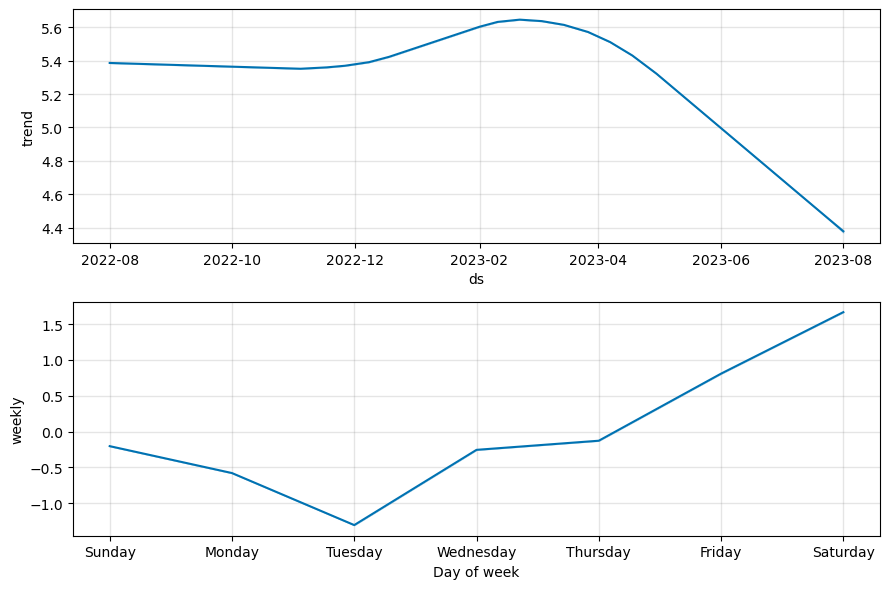

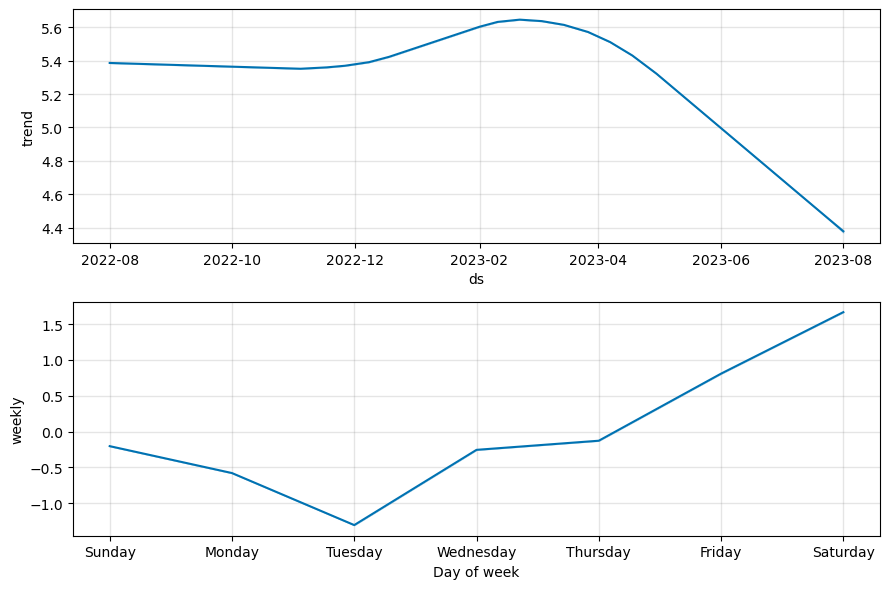

In [41]:
model.plot_components(forecast)

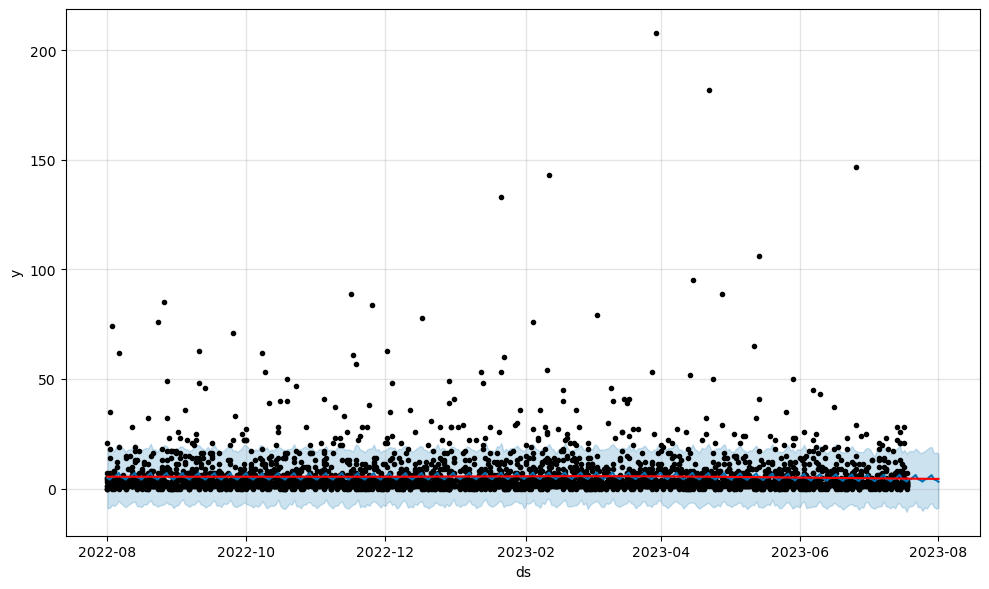

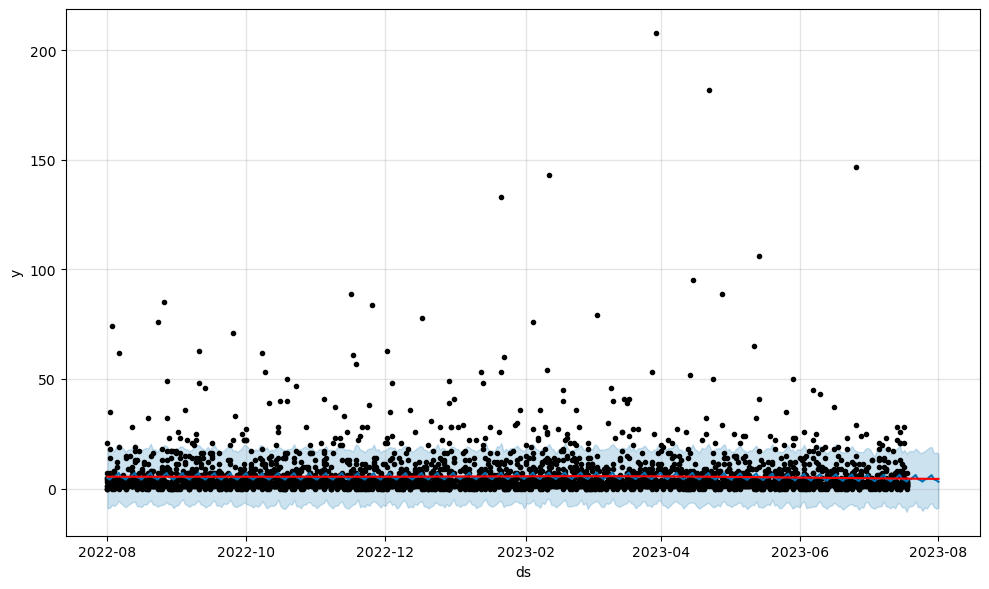

In [42]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),model,forecast)
fig

In [43]:
ts = train.y.values

t = np.arange(0, len(ts))

period_daily = 24

a0_daily = np.mean(ts)

n_components = 5
a_daily = [2 * np.mean(ts * np.cos(2 * np.pi * i * t / period_daily)) for i in range(1, n_components+1)]
b_daily = [2 * np.mean(ts * np.sin(2 * np.pi * i * t / period_daily)) for i in range(1, n_components+1)]

seasonal_daily = a0_daily + sum([a_daily[i-1] * np.cos(2 * np.pi * i * t / period_daily) + b_daily[i-1] * np.sin(2 * np.pi * i * t / period_daily) for i in range(1,n_components+1)])
seasonal_daily = seasonal_daily - seasonal_daily.mean()

In [44]:
mean_absolute_error(test.y, forecast.loc[4000:, 'yhat'].values)

ValueError: Found input variables with inconsistent numbers of samples: [170687, 0]